In [71]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (18, 5)
TABLE_DIR = "tables"

# https://data.cso.ie/table/HPM04
buyer_data = pd.read_csv(os.path.join(TABLE_DIR, "Market-basedHousholdPurchasesofRedisentialDwellings.csv"))
full_year = buyer_data["Month"].str[0:4].astype(float)
partial_year = (buyer_data["Month"].str[5:].astype(float) - 1) / 12
buyer_data["Year"] = full_year + partial_year
buyer_data["Location"] = buyer_data["Eircode Output"].str.replace('^[a-zA-Z]+[0-9]+:\s*', '', regex=True)
buyer_data["Type of Buyer"] = buyer_data["Type of Buyer"].str.replace('^Household Buyer - ', '', regex=True)
for col in ["Month", "Dwelling Status", "Eircode Output"]:
    buyer_data.pop(col)
buyer_data

,Statistic,Stamp Duty Event,Type of Buyer,UNIT,VALUE,Year,Location
0,Volume of Sales,Filings,All Buyer Types,Number,982.0,2010.000000,All
1,Volume of Sales,Filings,First-Time Buyer Owner-Occupier,Number,534.0,2010.000000,All
2,Volume of Sales,Filings,Former Owner-Occupier,Number,292.0,2010.000000,All
3,Volume of Sales,Filings,Non-Occupier,Number,156.0,2010.000000,All
4,Volume of Sales,Executions,All Buyer Types,Number,947.0,2010.000000,All
...,...,...,...,...,...,...,...
315835,Mean Sale Price,Filings,Non-Occupier,Euro,231454.0,2021.666667,Wexford
315836,Mean Sale Price,Executions,All Buyer Types,Euro,258224.0,2021.666667,Wexford
315837,Mean Sale Price,Executions,First-Time Buyer Owner-Occupier,Euro,178700.0,2021.666667,Wexford
315838,Mean Sale Price,Executions,Former Owner-Occupier,Euro,275375.0,2021.666667,Wexford


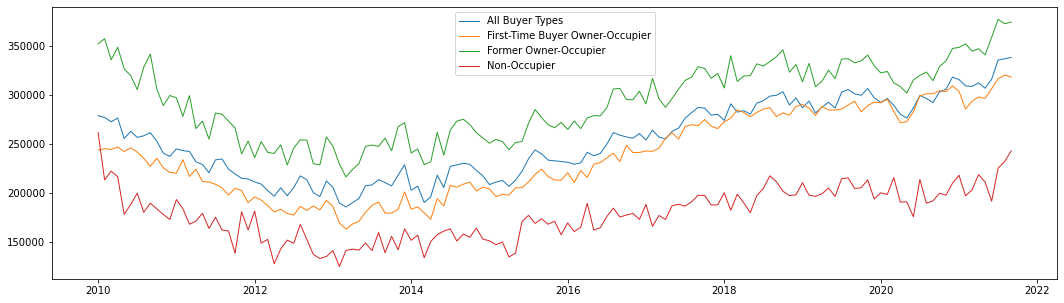

In [121]:
mean_sale_price = buyer_data.loc[
    (buyer_data["Statistic"] == "Mean Sale Price")
    & (buyer_data["Location"] == "All")
    & (buyer_data["Stamp Duty Event"] == "Filings")
]
mean_sale_price_by_buyer_type = mean_sale_price.groupby("Type of Buyer")
for type_of_buyer, df in mean_sale_price_by_buyer_type:
    plt.plot(df['Year'], df['VALUE'], label=type_of_buyer, linewidth=1)
plt.legend()

In [122]:
# Pearson product-moment correlation coefficients.
d = {k: v["VALUE"].tolist() for k, v in mean_sale_price_by_buyer_type}
items = list(d.items())
columns = list(d.keys())
rows = map(list, zip(*[d[k] for k in columns]))
df = pd.DataFrame(rows, columns=columns)
columns, np.corrcoef(df)

(['All Buyer Types',
  'First-Time Buyer Owner-Occupier',
  'Former Owner-Occupier',
  'Non-Occupier'],
 array([[1.        , 0.92734925, 0.93539012, ..., 0.66348494, 0.64024115,
         0.68250788],
        [0.92734925, 1.        , 0.99957532, ..., 0.89428457, 0.88010924,
         0.90481184],
        [0.93539012, 0.99957532, 1.        , ..., 0.88506367, 0.87035885,
         0.8964559 ],
        ...,
        [0.66348494, 0.89428457, 0.88506367, ..., 1.        , 0.99952762,
         0.99949603],
        [0.64024115, 0.88010924, 0.87035885, ..., 0.99952762, 1.        ,
         0.99827307],
        [0.68250788, 0.90481184, 0.8964559 , ..., 0.99949603, 0.99827307,
         1.        ]]))